
## Task 1: Object Detection


## By: Andirie Sen Rastogi



### Aim: To implement an object detector which identifies the classes of the objects in an image or video.


#### Object detection in an image

In [1]:
#importing the required libraries
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading yolov3 by passing weights and cfg files
net = cv.dnn.readNet("yolov3.weights","yolov3.cfg")
classes=[]
with open("coco.names","r") as f:
    classes = [line.strip() for line in f.readlines()]
model = cv.dnn_DetectionModel(net)

In [3]:
#there are 80 labels that yolov3 can identify
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [4]:
#defining the output layers

In [5]:
net.getLayerNames()

['conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [6]:
net.getUnconnectedOutLayers()

array([[200],
       [227],
       [254]], dtype=int32)

In [7]:
layer_names = net.getLayerNames()

In [8]:
outputLayers= [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]

In [9]:
outputLayers

['yolo_82', 'yolo_94', 'yolo_106']

In [10]:
colors = np.random.uniform(0,255,size=(len(classes),3))

In [11]:
#loading image
img = cv.imread("kplp6m2bvfj01.jpg")
h,w,c= img.shape

shape of image: 


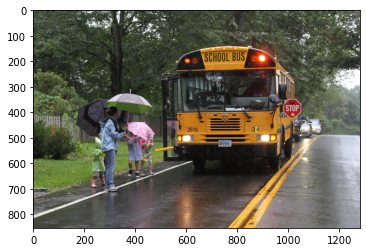

In [12]:
# displaying the original image
%matplotlib inline
def image_and_shapes(image):
    img= plt.imread(image)
    plt.imshow(img)
    print("shape of image: ".format(img.shape))
image_and_shapes("kplp6m2bvfj01.jpg")

In [13]:
#extracting features ie. detecting objects

blob = cv.dnn.blobFromImage(img,0.00392,(416,416),(0,0,0),True, crop= False)

In [14]:
net.setInput(blob)
outs = net.forward(outputLayers)
print(outs[1])

[[0.0172136  0.02406492 0.0468272  ... 0.         0.         0.        ]
 [0.01298615 0.01974264 0.2952372  ... 0.         0.         0.        ]
 [0.02420929 0.02041088 0.09086853 ... 0.         0.         0.        ]
 ...
 [0.9742454  0.9804565  0.04262232 ... 0.         0.         0.        ]
 [0.9850079  0.97922164 0.33299968 ... 0.         0.         0.        ]
 [0.9811086  0.98275536 0.06861483 ... 0.         0.         0.        ]]


In [15]:
#finding confidence score of algorithm in object detection in blob
class_ids=[]
confidences =[]
boxes =[]
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        #object detected
        if confidence > 0.7:
            center_x= int(detection [0] * w)
            center_y= int(detection [1] * h)
            ww = int(detection [2] * w)
            hh = int(detection [3] * h)
            
            #coordinates of a rectangle
            x= int(center_x - ww/2)
            y= int(center_y - hh/2)
            
            boxes.append([x,y,ww,hh])
            confidences.append(float(confidence)) 
            class_ids.append(class_id)
            

In [16]:
#to eliminate multiple detections for same object
#using non - max suppression
#anything with IOU_threshold < 0.6 will be removed
indexes = cv.dnn.NMSBoxes(boxes,confidences,0.4,0.6) 

# to loop over all the boxes
font = cv.FONT_HERSHEY_PLAIN
colors= np.random.uniform(0,255,size= (len(boxes),3))
for i in range(len(boxes)):
    if i in indexes:
        x,y,ww,hh = boxes[i]
        label= str(classes[class_ids[i]])
        confi = str(round(confidences[i],2))
        color = colors[i]
        cv.rectangle(img,(x,y),(x+ww,y+hh),color,2)
        cv.putText(img,label+" "+ confi,(x,y+20),font,1,(0,255,255),2)
cv.imshow("Image",img)
cv.waitKey(0)
cv.destroyAllWindows()

### object detection in video

In [17]:
#loading files
config= r'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozenmodel = r'frozen_inference_graph.pb'
model = cv.dnn_DetectionModel(frozenmodel,config)

In [18]:
#scaling model
model.setInputParams(size=(416, 416), scale=1/255)

In [19]:
#loading video
cap = cv.VideoCapture("PexelsVideos2880.mp4")
if not cap.isOpened():
    raise IOError("cannot open video")

In [20]:
#breaking video frame by frame and detecting objects by predicting confidence
import imutils
while True:
    ret,frame = cap.read()
    ClassIndex, conf,bbox = model.detect(frame,0.6,0.4)
    if len(ClassIndex)!=0:
        for ClassInd, con, boxx in zip(ClassIndex.flatten(),conf.flatten(),bbox):
            if ClassInd <=80:
                
                cv.rectangle(frame, boxx,(255,0,0),2)
                cv.putText(frame, classes[ClassInd-1]+" "+ str(round(con,2)),(boxx[0],boxx[1]+20),cv.FONT_HERSHEY_COMPLEX,1,(0,255,255),2)
    frame = imutils.resize(frame,700)
    cv.imshow("output",frame)
    if cv.waitKey(2) & 0xFF == ord('a'):
        break
cap.release()
cv.destroyAllWindows()